# Introduction

As you become a more experienced developer and begin to work with other developers you will need to test your code so that you can be sure that what you build will work. Successfully testing your code gives you the confidence that your program is doing and behaving exactly as it should.

Let's learn how to test our code using Python's *unittest* module. We'll write a test case and check that a set of inputs provides the expected outputs.

We start by creating a function:

In [1]:
# name_function_a.py

def get_formatted_name(first, last):
    """Generate a neatly formatted full name."""
    full_name = f"{first} {last}"
    return full_name.title()

The contents of this function should be familiar to you. It combines a first and last name.

In [ ]:
# name_function_a.py

def get_formatted_name(first, last):
    """Generate a neatly formatted full name."""
    full_name = f"{first} {last}"
    return full_name.title()

print("Enter 'q' to quit.")
while True:
    first = input("\nPlease enter a first name: ")
    if first == 'q':
        break
    last = input("Please enter a last name: ")
    if last == 'q':
        break
        
    formatted_name = get_formatted_name(first, last)
    print(f"\tName: {formatted_name}.")

Enter 'q' to quit.

Please enter a first name: 


Our program works, it produces a correctly formatted first and last name. But what if, at a later date, we modify this program so that it takes a middle name? We will want to make sure that we don't break the way the function handles names that have only a first and last name. We could manually test our code but as our programs get bigger that would lead to delays and errors. Instead Python gives us a way to automate the testing of a function's output. If we automate the testing of *get_formatted_name()* we will know that the function is working when provided with the type of names that we have written tests for.

### Unit and test cases

The module *unittest* from the Python standard library provides tools for testing our code. A unit test verifies that one specific aspect of a function's behavior is working as expected. A *test case* is a collection of unit tests that together prove that a function behaves as it's supposed to. A good test case will consider all the possible kinds of user input that a function could receive and includes tests to represent each of these situations. A test case with *full coverage* includes a full range of unit tests covering all the possible ways that a function can be used.

### A passing test

It takes a bit of practice to get used to the syntax of a test case. To write a test case for a function we import the *unittest* module and the function we want to test. We then create a class that inherits from *unittest.TestCase* and write a series of methods to test different aspects of our functions behavior. 

Let's get started:

In [ ]:
# test_name_function_a.py

import unittest
from name_function_a import get_formatted_name

class NamesTestCase(unittest.TestCase):
    """Tests for 'name_function'."""
    
    def test_first_last_name(self):
        "Test simple first and last names."
        formatted_name = get_formatted_name('tony', 'staunton')
        self.assertEqual(formatted_name, 'Tony Staunton')
        
if __name__ == '__main__':
    unittest.main()

In this code example, we first import *unittest* and the function that we want to test, *get_formatted_name()*. At line 6 we created a class called *NamesTestCase*, which will contain a series of unit tests for *get_formatted_name()*. The class can be named anything we want. It's best practice to name it something related to the function that you are about to test and to use *Test* in the class name. This class must inherit from the class *unittest.TestCase* so Python knows how to run the tests we write.

Inside *NamesTestCase* there is a single method that tests one aspect of *get_formatted_name()*. This method is called *test_first_last_name* as we are confirming that names with only a first and last name are formatted correctly. Any method that starts with *test_* will be run automatically when we run *test_name_function.py*. Within this method we call the function that we want to test. In this case, at line 9, we call *get_formatted_name()* with the arguments 'tony' and 'staunton' and assign the result to *formatted_name*.

At line 10 we have an assert method. This method verifies that a result received matches the expected result. For our program, we know that *get_formatted_name()* is supposed to return a capitalized, and spaced name, we expect the value of *formatted_name* to be *Tony Staunton*. To check if this is true, we use *unittests assertEqual()* method and pass it *formatted_name* and 'Tony Staunton'.

Next, we're going to run this file directly. The *if* block at line 14 is a special variable which is set when the program is executed. If this file is being run as the main program, the value of *__name__* is set to '__main__'. We then call *unittest.main()* which runs the test case. When we run *test_name_function.py* we get the following output:

A single dot on the first line means that one test has run and passed. The next line informs us that Python ran one test and it took 0.000s to run. The last line, which says 'OK' tells us that all unit tests in the test case passed.

This output tells us that the function *get_formated_name()* will work for the expected names composed of first name and last name.


### A failing test

What happens when a test fails? Let's update the function *get_formatted_name()* so that it takes a middle name. We'll modify the function in a way that breaks our test so that we can see what a failed test looks like.

In [ ]:
# name_function_b.py

def get_formatted_name(first, middle, last):
    """Generate a neatly formatted full name."""
    full_name = f"{first} {middle} {last}"
    return full_name.title()

If we run our test again, we see that it is now failing. 

A failed test produces a lot of output. The first line showing an 'E', tells us that one unit test in the test case produced an error. We then see that *test_first_last_name()* in *NamesTestCase* caused an error. Obviously we have to know which test failed so this piece of information is critical. Next, we have the standard traceback which tells us that the function call *get_formatted_name('tony', 'staunton')* is no longer working because it is missing a required positional argument.

We also see that one unit test was run. On the last line we see an additional message telling us that the overall test case failed and that one error occurred when running the test case.

### How to respond to a failed test

When a test fails don't fix the test, fix the code that caused the test to fail. Go back over any changes that you may have made and figure out how those changes broke the expected behavior.

In this example *get_formatted_name()* used to need two parameters, now it needs three because we have added a middle name. The addition of this third parameter broke expected output of *get_formatted_name()*. The best solution to this failed test is to make the middle name optional. Once we do that, out test names like 'Tony Staunton' should pass, and we should be able to accept middle names as well. 

Let's update *get_formatted_name()* so that middle names are optional and run the test case again.

To make the middle name parameter optional we move it to the end of the parameter list in the function definition and give it an empty default value. We also add an *if* statement that builds the full name properly, depending on whether or not a middle name is provided.

In [ ]:
# name_function_b.py

def get_formatted_name(first, last, middle=''):
    """Generate a neatly formatted full name."""
    if middle:
        full_name = f"{first} {middle} {last}"
    else:
        full_name = f"{first} {last}"
    return full_name.title()

In this updated version of *get_formatted_name()* the middle name is now optional. Let's run our test again for 'Tony Staunton':

The test case is now passing.

### Adding new tests

Now that we have *get_formatted_name()* working again, let's add a second test for people who include a middle name. We do this by adding another method to the class *NamesTestCase*:

In [ ]:
# test_name_function_c.py

import unittest
from name_function_c import get_formatted_name

class NamesTestCase(unittest.TestCase):
    """Tests for 'name_function'."""
    
    def test_first_last_name(self):
        "Test simple first and last names."
        formatted_name = get_formatted_name('tony', 'staunton')
        self.assertEqual(formatted_name, 'Tony Staunton')
        
    def test_first_last_middle_name(self):
        """Do middle names work?"""
        formatted_name = get_formatted_name('tony', 'staunton', 'frank')
        self.assertEqual(formatted_name, 'Tony Frank Staunton')
        
if __name__ == '__main__':
    unittest.main()

This new method is called *test_first_last_middle_name()*. The method name must start with *test_* so that it runs automatically when we run *test_name_function.py*. This method name also makes it clear which behavior of *get_formatted_name()* we're testing. Don't worry if your test method names start to get a bit long as they need to be descriptive.

To test the function we call *get_formatted_name()* with a first, last, and middle name. We then use *assertEqual()* to check that the returned full name matches the expected full name of first, last and middle names.

## Exercises

- Write a function that accepts two parameters, your city and country. Have the function return a single string.
- Create a file called *test_address.py* that tests the function you just wrote.
- After you have your test passing modify your function to take a third parameter, *population*, and adjust your function so that it still returns a single string, *city, country - population*
- Run your test again and make sure that it fails due to population
- Modify your function so that *population* is optional
- Run your test again to make sure that it now passes
- Add a second test to confirms you can call the function with population
- Run your test file again

## Testing a class

We're now going to write tests for a class. 

### Several assert methods

There are several assert methods in the *unittest.TestCase class*. Assert methods test whether a condition you believe is true at a specific point in your code is in fact true. If your assumption is true then you can be confident that no errors exist.

Below is a list of several common assert methods. These methods can only be used in a class that inherits from *unittest.TestCase*:

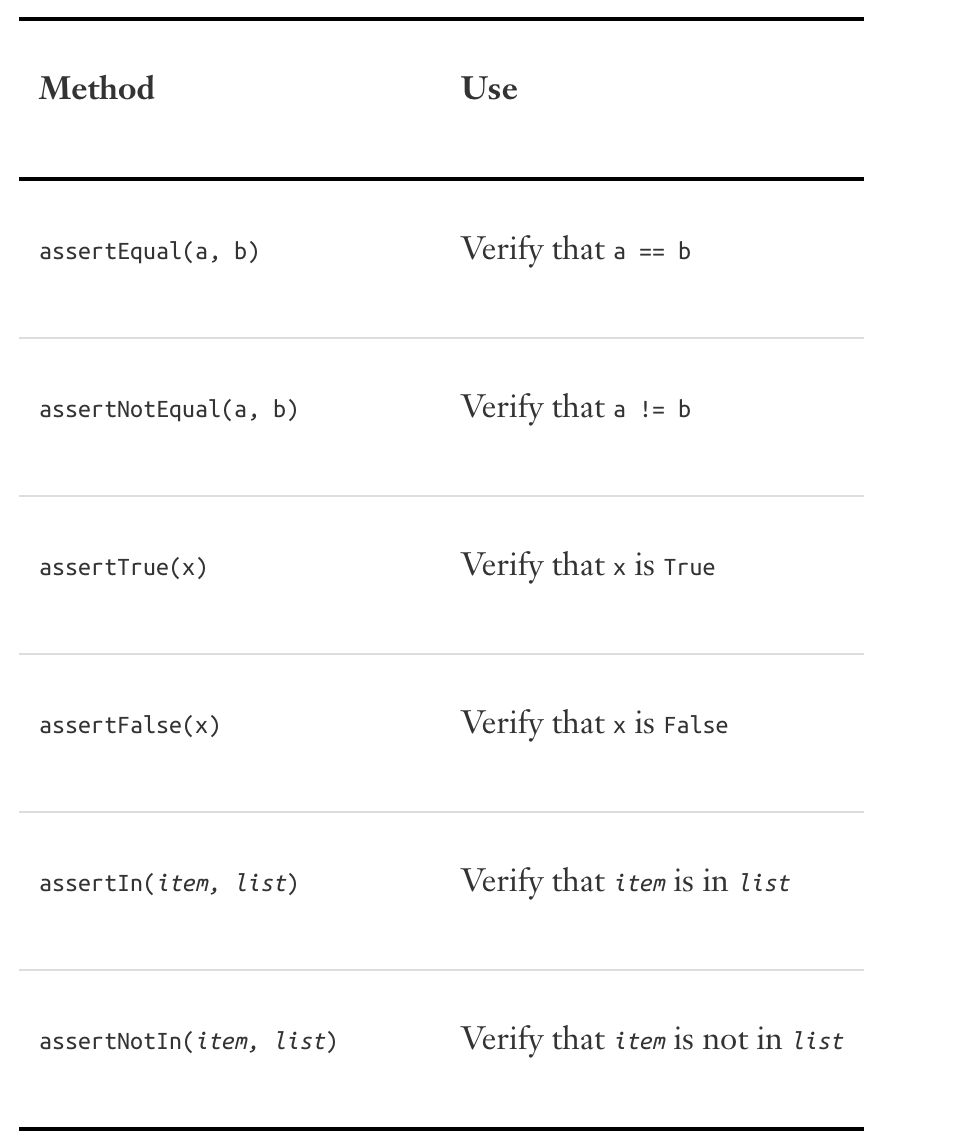



### Testing a class

Testing a class is similar to testing a function, a lot of our work will involve testing the behavior of the methods in the class. Let's write a class to test:

In [ ]:
# employee_survey.py

class EmployeeSurvey:
    """Collect employee feedback."""
    
    def __init__(self, question):
        """Store a question, and prepare to store responses."""
        self.question = question
        self.responses = []
        
    def show_question(self):
        """Show the survey question."""
        print(self.question)
        
    def store_response(self, new_response):
        """Store a single response to the survey."""
        self.responses.append(new_response)
        
    def show_results(self):
        """Show all the responses that have been given."""
        print("Survey results:")
        for response in self.responses:
            print(f"- {responses}")

In this class we start off with a survey question that we provide at line 8. We also include an empty list to save responses. Our class has the ability to print survey questions using the method *show_question()* at line 11. Starting at line 15 we have a method that adds a new response to the response list. Then at line 19 we have a method, *show_results()* which will print out all the responses stored in the list. 

To create an instance from this class all we have to do is provide a question. Once we have an instance representing a survey, we display the survey question with *show_question()*, store a response using *store_responses()* and then show results with *show_results()*. Easy!

Now, let's write a program that puts this class to work:

In [ ]:
# employee_survey_questions.py

from employee_survey import *

# Define a question and create a survey
question = "How long have you been in your current job?"
my_survey = EmployeeSurvey(question)

# Show the question and store responses to the question
my_survey.show_question()
print("Enter 'q' to quit.\n")
while True:
    response = input("Years and months: ")
    if response == 'q':
        break
    my_survey.store_response(response)
    
# Show the results
print("\nThank you for your time.")
my_survey.show_results()

This is a great little program. We first define a question, and then create an *EmployeeSurvey* object with that question. The program calls *show_question()* to display the question and then prompts for responses. Each response is stored as it is received. When the user has completed the survey they can enter 'q' to quit and *show_results()* will print out the survey results.

Let's improve *EmployeeSurvey* and the module it is in, *survey.py*. We could allow each user to enter more than one response. We could write a method to list only unique responses and to report how many times each response was given. We could write another class to manage other surveys.

All of these improvements pose a risk to the current working program. While adding the ability to enter more than one response we could accidentally change how responses are handled or display on screen. To ensure that we don't break the current behavior as we improve this program we can write tests.

### Testing the EmployeeSurvey class

Let's write a test that verifies one aspect of the way *EmployeeSurvey* behaves. We'll create a test to confirm that a single response to the survey question is stored properly. We'll use the *assertIn()* method to verify that the response is in the list of responses after it has been stored:

In [ ]:
# test_employee_survey.py

import unittest

from employee_survey import *


class TestEmployeeSurvey(unittest.TestCase):
    """Tests for the class EmployeeSurvey."""
    
    def test_store_single_response(self):
        """Test that a single response is stored properly."""
        question = "What is your current role?"
        my_survey = EmployeeSurvey(question)
        my_survey.store_response('project manager')
        self.assertIn('project manager', my_survey.responses)
        
if __name__ == '__main__':
    unittest.main()

In this test we start by importing the *unittest* module and the class that we want to test, *EmployeeSurvey*. At line 27 we call our test case *TestEmployeeSurvey*, which inherits from *unittest.TestCase*. The first test method at line 29 will verify that when we store a response to the survey question, the response ends up in the surveys list of responses. We call this test method *test_store_single_response()*. If this test fails we'll know from the method name shown in the output of the failing test that there was a problem storing a single response to the survey.

To test the behavior of a class, we need to make an instance of the class. We do this at line 32, where we create an instance called *my_survey* with the question *'What is your current role?'*. We store a single response, *'project manager'*, using the *store_response()* method. Then we verify that the response was stored correctly by asserting the *project manager* is in the list *my_survey.responses*.

    test output
    
When we run the test it passes.

Now, lets update out test case to verify that three responses can be stored. to do this we add another method to *TestEmployeeSurvey*:

In [ ]:
# test_employee_survey.py

import unittest

class TestEmployeeSurvey(unittest.TestCase):
    """Tests for the class EmployeeSurvey."""
    
    def test_store_single_response(self):
        """Test that a single response is stored properly."""
        question = "What is your current role?"
        my_survey = EmployeeSurvey(question)
        my_survey.store_response('project manager')
        self.assertIn('project manager', my_survey.responses)
        
    def test_store_three_responses(self):
        """Test that three individual responses can be stored."""
        question = "What is your current role?"
        my_survey = EmployeeSurvey(question)
        responses = ['project manager', 'business analysis', 'product owner']
        for response in responses:
            my_survey.store_response(response)
            
        for response in responses:
            self.assertIn(response, my_survey.responses)
        
if __name__ == '__main__':
    unittest.main()

This new test method is called *test_store_three_responses()*. We create a survey object just as we did in the other test. We define a list containing three different responses at line 19, and then we call *store_response()* for each of these responses. Once the responses have been stored, we write another loop and assert that each response is now in *my_survey.responses* at line 21.

When we run the test again both tests should pass.

### The setUp() Method

In our last test file, *test_employee_survey_b.py*, we created a new instance of *EmployeeSurvey* in each test method, and we created new responses in each method. The class *unittest.TestCase()* has a *setUp()* method that allows us to create these objects once and then use them in each of our test methods.

When we include a *setUp()* method in a *TestCase* class, Python runs the *SetUp()* method before running each method starting with *test_*. Any objects created in the *setUp()* method are then available in each test method we write.

Let's use *setUp()* to create a survey instance and a set of responses that can be used in the *test_store_single_response* and *test_store_three_responses*:

In [ ]:
# test_survey.py

import unittest

class TestEmployeeSurvey(unittest.TestCase):
    """Tests for the class EmployeeSurvey."""
    
    def setUp(self):
        """create a survey and a set of respones for use in all test methods."""
        question = "What is your current role?"
        self.my_survey = EmployeeSurvey(question)
        self.responses = ['project manager', 'business analysis', 'product owner']
        
    def test_store_single_response(self):
        """Test that a single response is stored properly."""
        my_survey.store_response(self.responses[0])
        self.assertIn(self.responses[0], my_survey.responses)
        
    def test_store_three_responses(self):
        """Test that three individual responses can be stored."""
        for response in self.responses:
            self.my_survey.store_response(repsonse)   
        for response in responses:
            self.assertIn(response, self.my_survey.responses)
        
if __name__ == '__main__':
    unittest.main()

The *setUp()* method does two things, it creates a survey instance at line 11, and it creates a list of responses at line 12. Each of these is prefixed with *self*, so that they can be used anywhere in the class. This makes the two test modules simpler, as neither one has to make a survey instance or a response. The method *test_store_single_response()* confirms that the first response in *self.responses, self.responses[0]* can be stored correctly, and *test_store_three_rsponses()* verifies that all three responses in *self.responses* can be store correctly.

If we run our tests again both test should still pass. The *setUp()* method makes test methods easier to write and less repetitive. 

## Exercises

- Write a class called employee. The __init__() method should take in a first name, last name and a salary amount. Store each of these as attributes. Write a method called, *give_bonus()* that adds $2000 to the salary by default but can accept a different amount.
- Write a test case for Empoyee. Write two test methods, *test_give_default_raise()* and *test_give_custom_raise()*. Use the *setUp()* method so that you don't have to create a new employee instance in each test method. Make sure both tests pass.